## Project Outline
* In this project, we will be scraping data from github/topics
* We will get top 25 repositories in each topic 
* For each topic, we will grab Repo name, Author, Stars and Repo URL

# Use Requests Library to download webpages

Requests is a python library for downloading webpages

In [1]:
import requests

In [2]:
topics_url = 'https://github.com/topics'

In [3]:
response = requests.get(topics_url)

In [4]:
response.status_code #(200-299) indicates successful response

200

In [5]:
len(response.text)

144765

In [6]:
page_contents = response.text
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" /><link crossorigin="anonymous" media="all" integrity="sha512-IX1PnI5wWBz8Kgb1JI0f2QFa/WuRQQHJHe0vkKinQzsxRlNb4b8NgODX5htSZVAAk

In [7]:
with open('webpage.html', 'w') as f:
    f.write(page_contents)

# Use BeautifulSoup to parse information from webpage

In [8]:
!pip install beautifulsoup4 --upgrade --quiet

In [9]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_contents, 'html.parser')
type(doc)

bs4.BeautifulSoup

In [10]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
topic_title_tags = doc.find_all('p', {'class': selection_class})
len(topic_title_tags)

30

In [11]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [12]:
desc_selector_class = 'f5 color-fg-muted mb-0 mt-1'
topic_desc_tags = doc.find_all('p', {'class': desc_selector_class})
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [13]:
topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-grow-0'})
len(topic_link_tags)

30

In [14]:
topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [15]:
topic_titles = []
for tag in topic_title_tags:
    topic_titles.append(tag.text)
topic_titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

In [16]:
topic_description = []
for desc in topic_desc_tags:
    topic_description.append(desc.text.strip())
topic_description[:5]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [17]:
topic_urls = []
base_url = "https://github.com"
for url in topic_link_tags:
    topic_urls.append(base_url + url['href'])
topic_urls[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

In [18]:
!pip install pandas --quiet

In [19]:
import pandas as pd

In [20]:
topics_dict = {
    'Title': topic_titles,
    'Description': topic_description,
    'URL': topic_urls
}

topics_df = pd.DataFrame(topics_dict)
topics_df.to_csv('topics.csv', index=None)

# Getting Information out of topic page

In [21]:
topic_page_url = topic_urls[0]
response = requests.get(topic_page_url)
response.status_code

200

In [22]:
topic_page_url

'https://github.com/topics/3d'

In [23]:
len(response.text)

648209

In [24]:
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [25]:
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
len(repo_tags)

30

In [26]:
a_tags = repo_tags[0].find_all('a') 

In [27]:
a_tags[0].text.strip()

'mrdoob'

In [28]:
a_tags[1].text.strip()

'three.js'

In [29]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[1]['href']
repo_url

'https://github.com/mrdoob/three.js'

In [30]:
star_tags = topic_doc.find_all('span', {'id': 'repo-stars-counter-star'})
len(star_tags)
    

30

In [31]:
star_tags[0]

<span aria-label="84125 users starred this repository" class="Counter js-social-count" data-pjax-replace="true" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="84,125">84.1k</span>

In [32]:
star_tags[0].text.strip()

'84.1k'

## Function to count star of 1 repository

In [33]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1])*1000)
    return int(stars_str)

parse_star_count('19.6k')       

19600

## Function to get author name, repo name, star count and repo url

In [34]:
def get_repo_info(h3_tag, star_tag):
    #returns all the required information about repo
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

get_repo_info(repo_tags[0], star_tags[0])
    

('mrdoob', 'three.js', 84100, 'https://github.com/mrdoob/three.js')

In [35]:
topics_repos_dict = {
    'username':[],
    'repo_name': [],
    'stars': [],
    'repo_url': []
}
for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topics_repos_dict['username'].append(repo_info[0])
    topics_repos_dict['repo_name'].append(repo_info[1])
    topics_repos_dict['stars'].append(repo_info[2])
    topics_repos_dict['repo_url'].append(repo_info[3])

    
 

## Data frame of 1 repository

In [36]:
topics_repos_df = pd.DataFrame(topics_repos_dict)

In [37]:
topics_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,84100,https://github.com/mrdoob/three.js
1,libgdx,libgdx,20300,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,19000,https://github.com/pmndrs/react-three-fiber
3,BabylonJS,Babylon.js,18000,https://github.com/BabylonJS/Babylon.js
4,aframevr,aframe,14400,https://github.com/aframevr/aframe
5,ssloy,tinyrenderer,14300,https://github.com/ssloy/tinyrenderer
6,lettier,3d-game-shaders-for-beginners,13400,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,11800,https://github.com/FreeCAD/FreeCAD
8,metafizzy,zdog,9300,https://github.com/metafizzy/zdog
9,CesiumGS,cesium,9000,https://github.com/CesiumGS/cesium


## Function to get dataframe for any topic

In [38]:
import os
def get_topic_repos(topic_url):
    response = requests.get(topic_url)
    if response.status_code !=200:
        raise Exception('Failed to load page')
    topic_doc = BeautifulSoup(response.text, 'html.parser')

    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
    star_tags = topic_doc.find_all('span', {'id': 'repo-stars-counter-star'})

    topics_repos_dict = {
    'username':[],
    'repo_name': [],
    'stars': [],
    'repo_url': []
     }

    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topics_repos_dict['username'].append(repo_info[0])
        topics_repos_dict['repo_name'].append(repo_info[1])
        topics_repos_dict['stars'].append(repo_info[2])
        topics_repos_dict['repo_url'].append(repo_info[3])

    return pd.DataFrame(topics_repos_dict)

        
def get_repo_info(h3_tag, star_tag):
    #returns all the required information about repo
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url  

def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1])*1000)
    return int(stars_str)
#Saving each topic repo as csv file
def scrape_topic(topic_url, topic_name):
    fname = topic_name + '.csv'
    if os.path.exists(fname):
        print("The file {} already exists. Skipping...".format(fname))
        return
    topic_df = get_topic_repos(topic_url)
    topic_df.to_csv(fname , index=None)
            

## Testing function by giving url input

In [39]:
url8 = topic_urls[8]
url8


'https://github.com/topics/arduino'

In [40]:
get_topic_repos(topic_urls[8])

,username,repo_name,stars,repo_url
0,arendst,Tasmota,18000,https://github.com/arendst/Tasmota
1,MarlinFirmware,Marlin,13500,https://github.com/MarlinFirmware/Marlin
2,arduino,Arduino,13000,https://github.com/arduino/Arduino
3,rwaldron,johnny-five,12700,https://github.com/rwaldron/johnny-five
4,tinygo-org,tinygo,11300,https://github.com/tinygo-org/tinygo
5,SpacehuhnTech,esp8266_deauther,10200,https://github.com/SpacehuhnTech/esp8266_deauther
6,espressif,arduino-esp32,9100,https://github.com/espressif/arduino-esp32
7,hybridgroup,gobot,7900,https://github.com/hybridgroup/gobot
8,gurugio,lowlevelprogramming-university,7700,https://github.com/gurugio/lowlevelprogramming...
9,platformio,platformio-core,6000,https://github.com/platformio/platformio-core


**Write a single function to:**
 1. Get the list of topics from topics page
 2. Get the list of top repos from individual topic pages
 3. Create a CSV of top repos for each topic

In [41]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

def get_topic_descs(doc):
    desc_selector_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector_class})
    
    topic_description = []
    for desc in topic_desc_tags:
        topic_description.append(desc.text.strip())
    return topic_description

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-grow-0'})
    topic_urls = []
    base_url = "https://github.com"
    for url in topic_link_tags:
        topic_urls.append(base_url + url['href'])
    return topic_urls
    
def scrape_topics():
    topics_url = 'https://github.com/topics'
    response.get = requests.get(topics_url)
    if response.status_code !=200:
        raise Exception('Failed to load page')
    topics_dict = {
        'Title': get_topic_titles(doc),
        'Description': get_topic_descs(doc),
        'URL': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)
    

In [42]:
def scrape_topic_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    for index,row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['Title']))
        scrape_topic(row['URL'], row['Title'])
    
    

In [45]:
scrape_topic_repos()

Scraping list of topics
Scraping top repositories for "3D"
The file 3D.csv already exists. Skipping...
Scraping top repositories for "Ajax"
The file Ajax.csv already exists. Skipping...
Scraping top repositories for "Algorithm"
The file Algorithm.csv already exists. Skipping...
Scraping top repositories for "Amp"
The file Amp.csv already exists. Skipping...
Scraping top repositories for "Android"
The file Android.csv already exists. Skipping...
Scraping top repositories for "Angular"
The file Angular.csv already exists. Skipping...
Scraping top repositories for "Ansible"
The file Ansible.csv already exists. Skipping...
Scraping top repositories for "API"
The file API.csv already exists. Skipping...
Scraping top repositories for "Arduino"
The file Arduino.csv already exists. Skipping...
Scraping top repositories for "ASP.NET"
The file ASP.NET.csv already exists. Skipping...
Scraping top repositories for "Atom"
The file Atom.csv already exists. Skipping...
Scraping top repositories for "

## Screenshot showing csv files
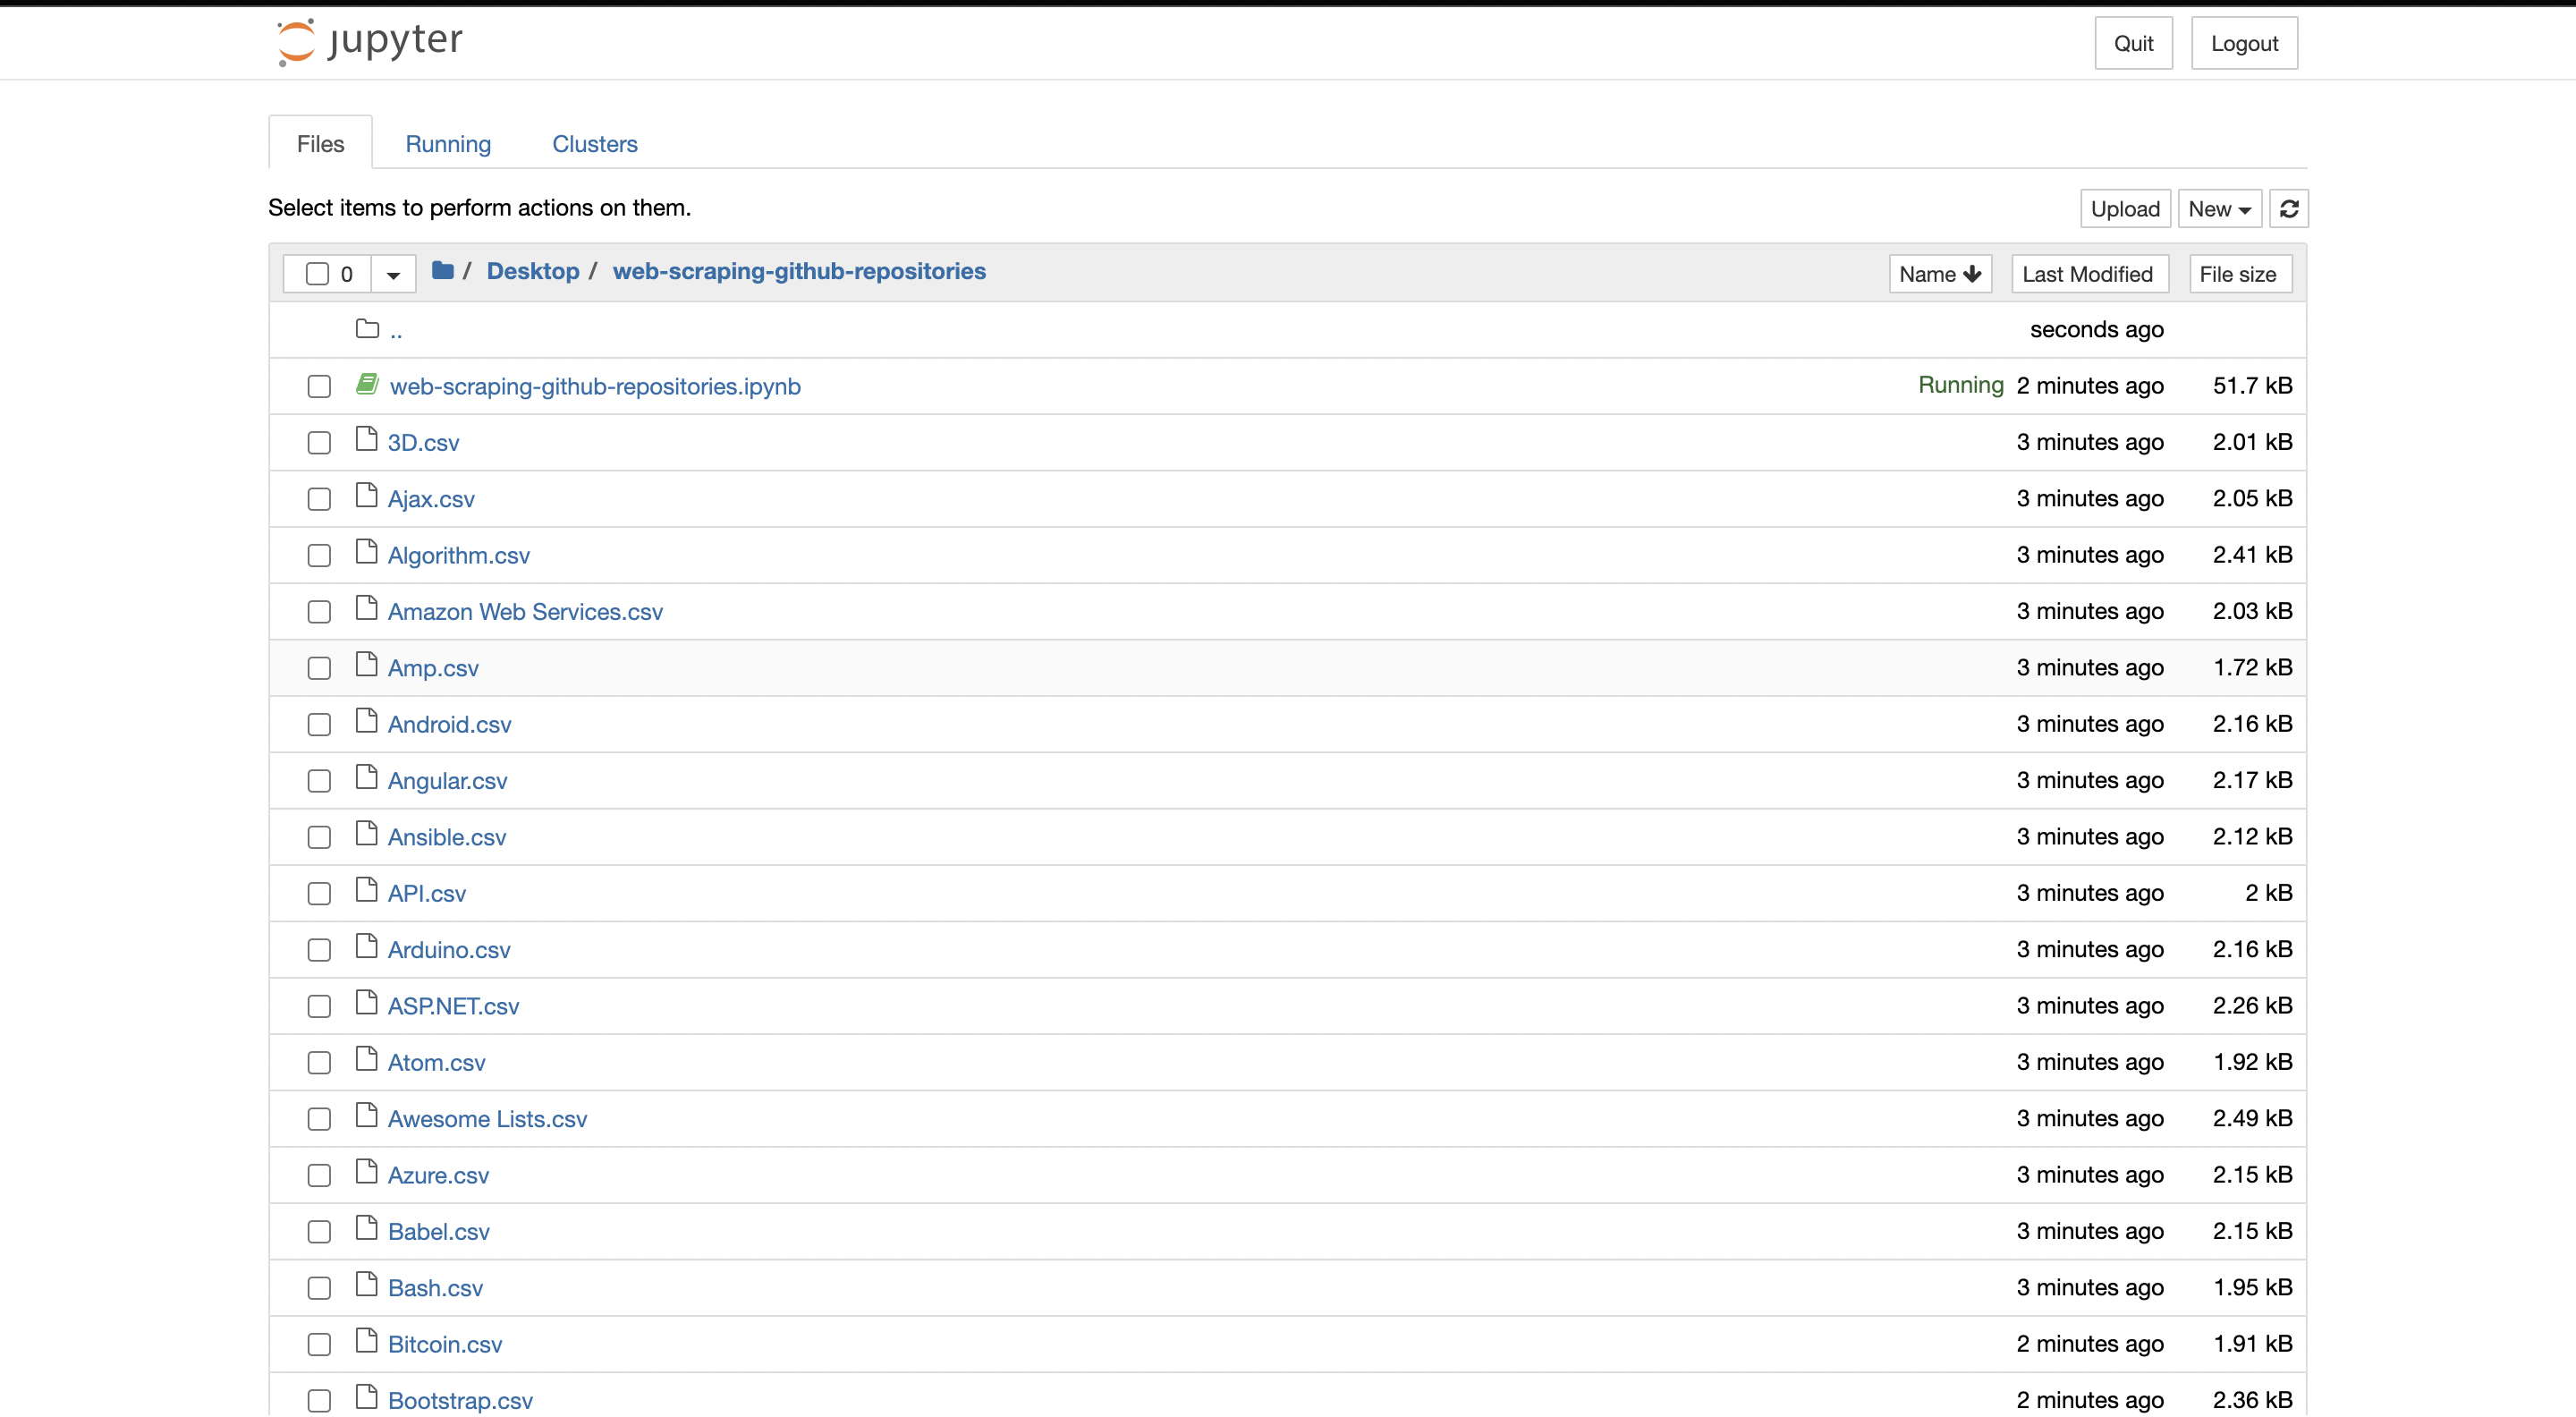